<a href="https://colab.research.google.com/github/Gcango/Analise_Descritiva_PNAD_2015/blob/main/Analise_Descritiva_dados_PNAD_2015.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Exercicio no âmbito do curso de Data Science da ALURA
Trabalho de Análise Descritiva de um Conjunto de Dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE.
O Objectivo foi responder as questões que se vão desenrolando a nível do Coolab.
A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
df = sns.load_dataset("penguins")

In [ ]:
dados = pd.read_csv("/content/dados-2.csv")

In [ ]:
dados.head(5)

In [48]:
print(f"A base de dados da PNAD 2015 possui {dados.shape[0]} linhas e {dados.shape[1]} colunas ")

A base de dados da PNAD 2015 possui 76840 linhas e 7 colunas 


In [49]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76840 entries, 0 to 76839
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UF              76840 non-null  int64  
 1   Sexo            76840 non-null  int64  
 2   Idade           76840 non-null  int64  
 3   Cor             76840 non-null  int64  
 4   Anos de Estudo  76840 non-null  int64  
 5   Renda           76840 non-null  int64  
 6   Altura          76840 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 4.1 MB


In [50]:
dados.describe()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
count,76840.000000,76840.000000,76840.000000,76840.000000,76840.000000,76840.000000,76840.000000
mean,31.912962,0.307002,44.071421,5.032613,9.469664,2000.383199,1.699512
std,11.147830,0.461253,12.480583,2.857118,4.539929,3323.387730,0.079717
min,11.000000,0.000000,13.000000,0.000000,1.000000,0.000000,1.339245
25%,25.000000,0.000000,34.000000,2.000000,6.000000,788.000000,1.645785
50%,31.000000,0.000000,43.000000,4.000000,11.000000,1200.000000,1.699325
75%,41.000000,1.000000,53.000000,8.000000,12.000000,2000.000000,1.753062
max,53.000000,1.000000,99.000000,8.000000,17.000000,200000.000000,2.028497


In [51]:
dados.isnull().sum()

UF                0
Sexo              0
Idade             0
Cor               0
Anos de Estudo    0
Renda             0
Altura            0
dtype: int64

In [52]:
dados.columns

Index(['UF', 'Sexo', 'Idade', 'Cor', 'Anos de Estudo', 'Renda', 'Altura'], dtype='object')

##Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:
<b>A</b> ► Acima de 25 SM
<b>B</b> ► De 15 a 25 SM
<b>C</b> ► De 5 a 15 SM
<b>D</b> ► De 2 a 5 SM
<b>E</b> ► Até 2 SM
Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

In [53]:
#1) - Define os intevalos das classes em reais (R$)

In [54]:
classes = [
    dados.Renda.min(),
    2 * 788,
    5 * 788,
    15 * 788,
    25 * 788,
    dados.Renda.max()
]
classes

[0, 1576, 3940, 11820, 19700, 200000]

In [55]:
#2) - Define os labels das classes

In [56]:
labels = ['E', 'D', 'C', 'B', 'A']
labels

['E', 'D', 'C', 'B', 'A']

In [57]:
#3) - Construa a coluna de frequências

In [58]:
frequencia = pd.value_counts(
  pd.cut(x = dados.Renda,
         bins = classes,
         labels = labels,
         include_lowest = True)
)
frequencia

E    49755
D    18602
C     7241
B      822
A      420
Name: Renda, dtype: int64

In [59]:
#4) - Construa a coluna de pecentuais

In [60]:
percentual = pd.value_counts(
  pd.cut(x = dados.Renda,
         bins = classes,
         labels = labels,
         include_lowest = True),
  normalize = True
) * 100
percentual

E    64.751432
D    24.208745
C     9.423477
B     1.069755
A     0.546590
Name: Renda, dtype: float64

In [61]:
#5) - Junta as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [62]:
dist_freq_renda = pd.DataFrame(
    {'Frequência': frequencia, 'Porcentagem (%)': percentual}
)
dist_freq_renda.sort_index(ascending = False)

,Frequência,Porcentagem (%)
A,420,0.546590
B,822,1.069755
C,7241,9.423477
D,18602,24.208745
E,49755,64.751432


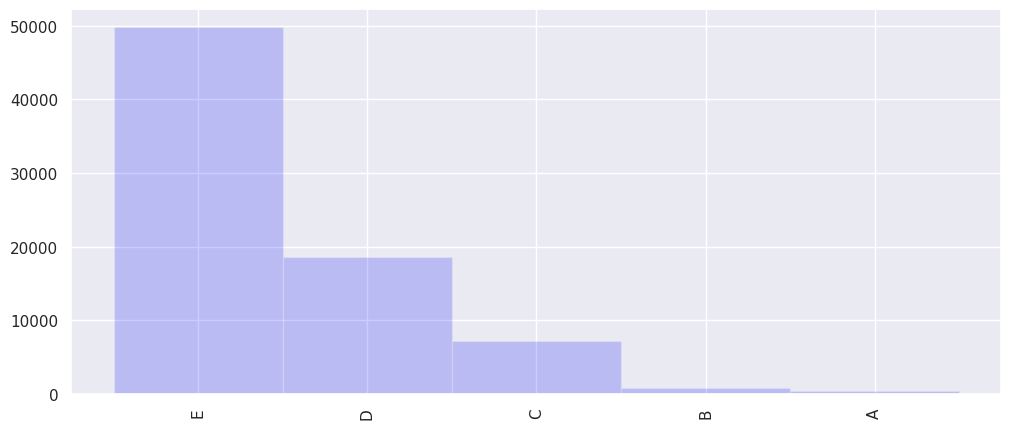

In [63]:
#6) - Insirindo Gráfico para visualizar as variaveis Frequências e Percentagem
dist_freq_renda['Frequência'].plot.bar(width = 1, color = 'blue', alpha = 0.2, figsize=(12, 5));

In [64]:
#7) - Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset. Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)¶

AttributeError: 'FacetGrid' object has no attribute 'set_title'

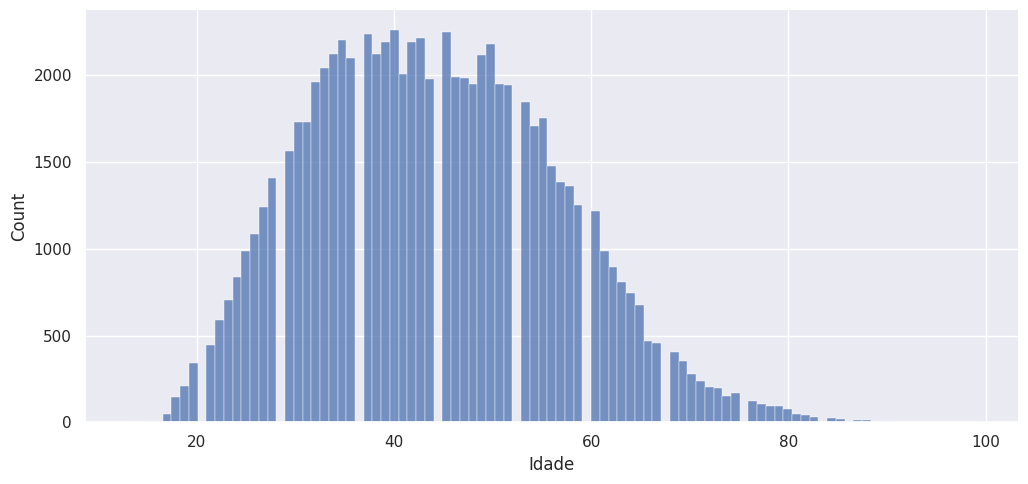

In [65]:
plot = sns.displot(dados['Idade'])
plot.figure.set_size_inches(12, 5)
plot.set_title('Distribuição de Frequências - IDADE', fontsize=18 )
plot.set_xlabel('Anos', fontsize=14)
plt.show()

AttributeError: 'FacetGrid' object has no attribute 'set_title'

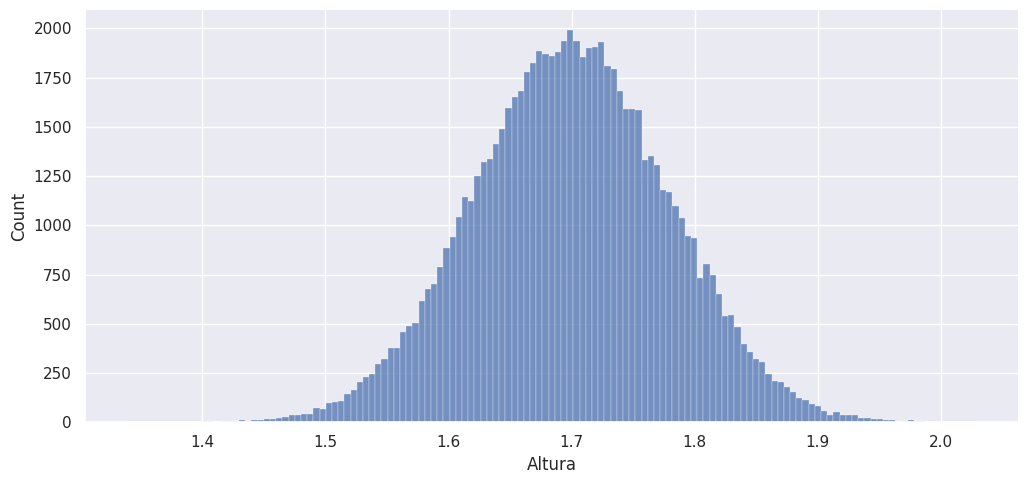

In [66]:
plot = sns.displot(dados['Altura'])
plot.figure.set_size_inches(12, 5)
plot.set_title('Distribuição de Frequências - ALTURA', fontsize=18)
plot.set_xlabel('Metros', fontsize7=14)
plt.show()

<ipython-input-67-d793cf1e8898>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados['Renda'])


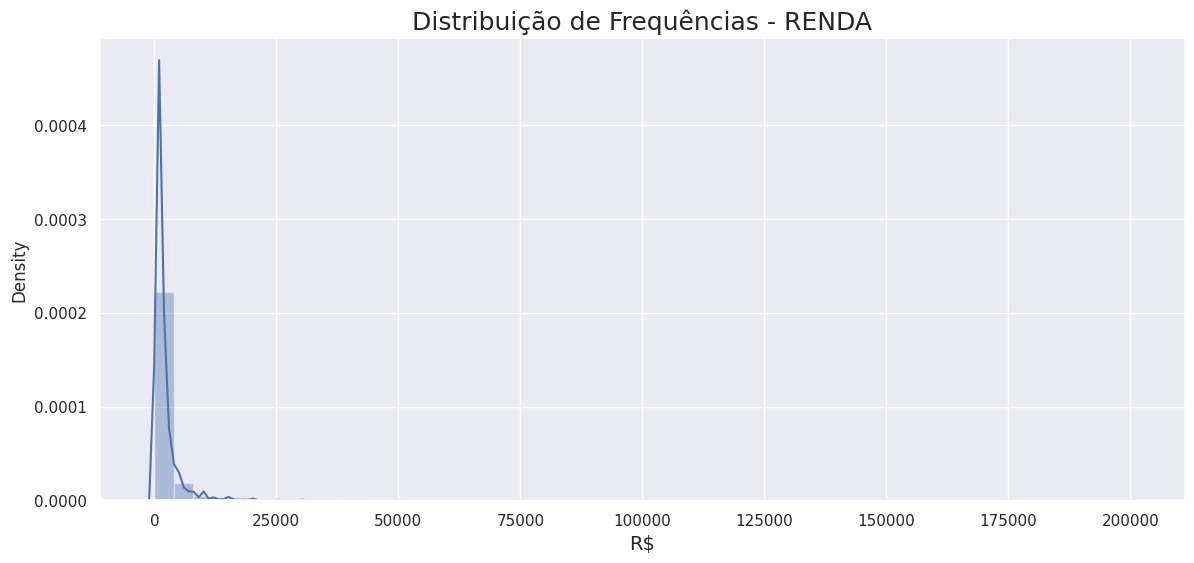

In [67]:
ax = sns.distplot(dados['Renda'])
ax.figure.set_size_inches(14, 6)
ax.set_title('Distribuição de Frequências - RENDA', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax
plt.show()

In [ ]:
#8) - Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

<ipython-input-68-3f51dc3a2828>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados.query('Renda < 20000')['Renda'])


<Axes: title={'center': 'Distribuição de Frequências - RENDA - Pessoas com renda até R$ 20.000,00'}, xlabel='R$', ylabel='Density'>

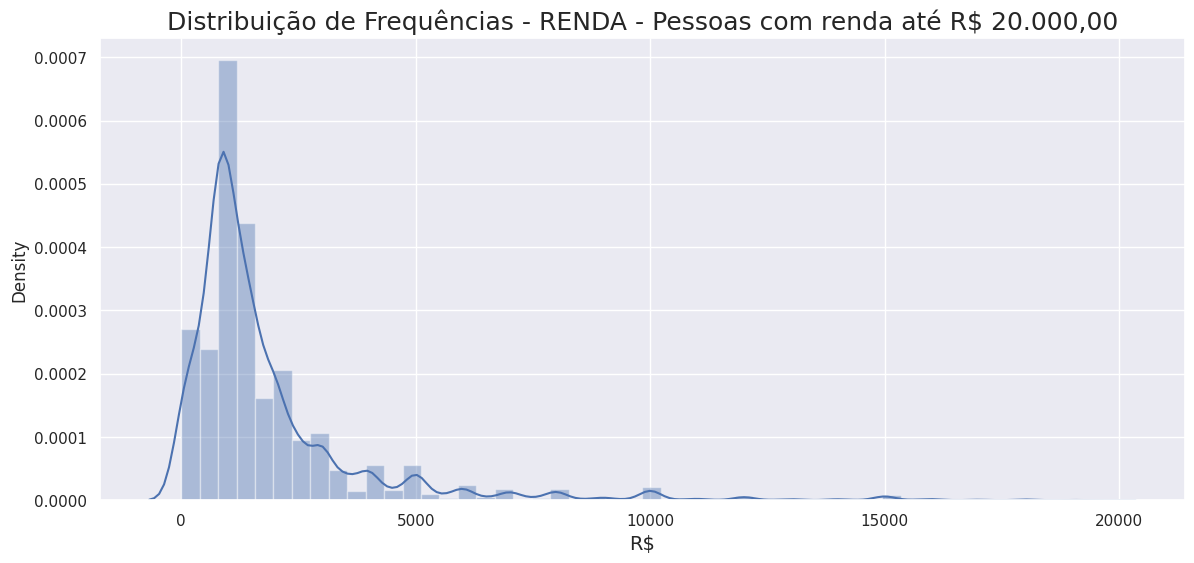

In [68]:
ax = sns.distplot(dados.query('Renda < 20000')['Renda'])
ax.figure.set_size_inches(14, 6)
ax.set_title('Distribuição de Frequências - RENDA - Pessoas com renda até R$ 20.000,00', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax

In [ ]:
#9) - Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#Avalie o resultado da tabela e escreva suas principais conclusões, Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto

In [70]:
sexo = {
    0: 'Masculino',
    1: 'Feminino'
}
cor = {
    0: 'Indígena',
    2: 'Branca',
    4: 'Preta',
    6: 'Amarela',
    8: 'Parda',
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano',
    2: '1 ano',
    3: '2 anos',
    4: '3 anos',
    5: '4 anos',
    6: '5 anos',
    7: '6 anos',
    8: '7 anos',
    9: '8 anos',
    10: '9 anos',
    11: '10 anos',
    12: '11 anos',
    13: '12 anos',
    14: '13 anos',
    15: '14 anos',
    16: '15 anos ou mais',
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia',
    12: 'Acre',
    13: 'Amazonas',
    14: 'Roraima',
    15: 'Pará',
    16: 'Amapá',
    17: 'Tocantins',
    21: 'Maranhão',
    22: 'Piauí',
    23: 'Ceará',
    24: 'Rio Grande do Norte',
    25: 'Paraíba',
    26: 'Pernambuco',
    27: 'Alagoas',
    28: 'Sergipe',
    29: 'Bahia',
    31: 'Minas Gerais',
    32: 'Espírito Santo',
    33: 'Rio de Janeiro',
    35: 'São Paulo',
    41: 'Paraná',
    42: 'Santa Catarina',
    43: 'Rio Grande do Sul',
    50: 'Mato Grosso do Sul',
    51: 'Mato Grosso',
    52: 'Goiás',
    53: 'Distrito Federal'
}

In [71]:
frequencia = pd.crosstab(dados.Sexo,
                         dados.Cor
                        )
frequencia.rename(index = sexo, inplace = True)
frequencia.rename(columns = cor, inplace = True)
frequencia

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [72]:
percentual = pd.crosstab(dados.Sexo,
                         dados.Cor,
                         normalize = True
                        ) * 100
percentual.rename(index = sexo, inplace = True)
percentual.rename(columns = cor, inplace = True)
percentual

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


In [ ]:
#10) - Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento.
#Obtenha a média aritimética, mediana, moda, desvio médio padrão, variança e desvio padrão

In [78]:
print(f"A Média dos dados da variavel [Renda] é de: {dados.Renda.mean()} ")
print(f"A Mediana da variavel [Renda] é de: {dados.Renda.median()} ")
print(f"A Moda da variavel [Renda] é de: {dados.Renda.mode()[0]} ")
print(f"O desvio médio absoluto da variavel [Renda] é de: {dados.Renda.mad()}")
print(f"A Variança da variavel [Renda] é de: {dados.Renda.var()}")
print(f"O desvio Padrão da variavel [Renda] é de: {dados.Renda.std()}")

A Média dos dados da variavel [Renda] é de: 2000.3831988547631 
A Mediana da variavel [Renda] é de: 1200.0 
A Moda da variavel [Renda] é de: 788 
O desvio médio absoluto da variavel [Renda] é de: 1526.4951371638058
A Variança da variavel [Renda] é de: 11044906.006217021
O desvio Padrão da variavel [Renda] é de: 3323.3877303464037


<ipython-input-78-b8babf3b2510>:4: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  print(f"O desvio médio absoluto da variavel [Renda] é de: {dados.Renda.mad()}")


1200.0

788

In [ ]:
dado